In [49]:
# Importing the Packages

import geopandas as gpd
import pandas as pd
from shapely.geometry import Point
from keplergl import KeplerGl
from matplotlib import pyplot as plt
import seaborn as sns

In [50]:
# Reading the Data

pedons_df = pd.read_csv('data\RaCA_SOC_pedons.csv')

In [51]:
# Making the List of Columns to Understand the Unique Identifier for both the datasets (Will be helpful for merging as well)

identifiers_pedons = ['upedonid', 'rcasiteid', 'upedon']

In [52]:
pedons_df.loc[pedons_df['upedon'] == 'C0101F011'][identifiers_pedons]

,upedonid,rcasiteid,upedon
43,C0101F01-1,C0101F01,C0101F011


* `upedon` - Unique RaCA pedon ID contains the site and pedon within the site
* `upedonid` - This column has lots of typos, sometimes a hyphen '-' is used sometimes an underscore '_' 
* `rcasiteid` - This column is needed for the Mapping with the General Location Data

In [53]:
pedons_df.drop(columns = ['upedonid'], inplace=True)


## Studying Pedons Dataset (Taking only the Columns to be focused on)

In [54]:
# Taking the list of columns which are needed for data analysis - Along with the Identifiers. 

pedons_columns_needed = ['upedon', 'rcasiteid','SOCstock5','SOCstock30', 'SOCstock100']
pedons_df = pedons_df[pedons_columns_needed]

In [55]:
pedons_df.head()

,upedon,rcasiteid,SOCstock5,SOCstock30,SOCstock100
0,A0108P921,A0108P92,15.126360,76.022073,100.113941
1,A0116P901,A0116P90,35.481720,95.965557,242.002573
2,A0116P941,A0116P94,36.827055,104.147733,293.079581
3,A0116X971,A0116X97,6.950620,29.854781,69.735244
4,A0120R931,A0120R93,13.072982,53.249971,116.996856


In [56]:
# Checking if there are no duplicate entries for upedon and rcasiteid

print(pedons_df['upedon'].nunique() == len(pedons_df))
print(pedons_df['rcasiteid'].nunique() == len(pedons_df))

True
True


**`Conclusion:`** - There are no duplicate records

['ForestLand', 'RangeLand', 'CropLand', 'PastureLand', 'Wetland', 'CRP']


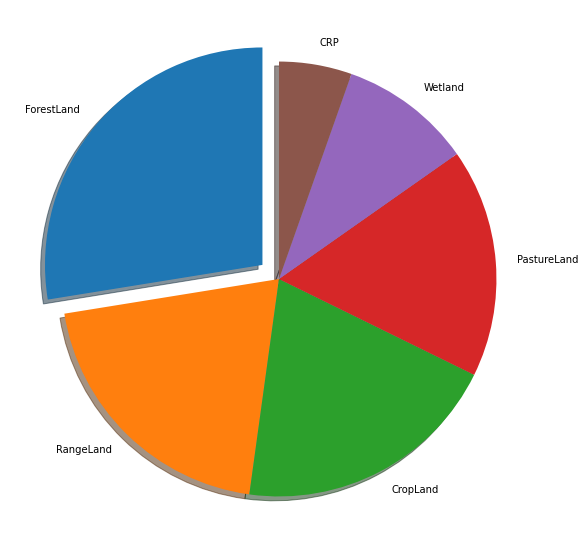

In [59]:
# Fetching the Land Use from the RaCA Side Id from upedon column and storing in a new column
# Taking the Land Use from the upedon column to ensure correct Land Use is entered for each data

#Slicing and taking the Keyword from the unique pedon ID i.e the 6th Letter of the code.
pedons_df.loc[:,'Land_Use'] = pedons_df['upedon'].apply(lambda x : x[5])

# Creating a dictionary to decode the Letter for the Land Use
land_use_dict = dict(C='Cropland', F='Forestland', P='Pastureland', R='Rangeland', W='Wetland', X='CRP')

# Replacing the LandUse with the Letters keywords. 
pedons_df.replace({'Land_Use' : land_use_dict}, inplace=True)


fig, ax = plt.subplots(figsize=(10,10))

#Plotting the Land Use in Pie Plot.
labels = ['ForestLand', 'RangeLand', 'CropLand', 'PastureLand', 'Wetland', 'CRP']
explode = (0.1, 0, 0, 0, 0, 0)
print(labels)
plt.pie(pedons_df.loc[:,'Land_Use'].value_counts(), labels=labels, shadow=True, startangle=90, explode=explode)
plt.show()

#### **`Conclusion:`** Based on the plot, we can say most of the Pedons (And Samples) are picked from the Forestland LandUse

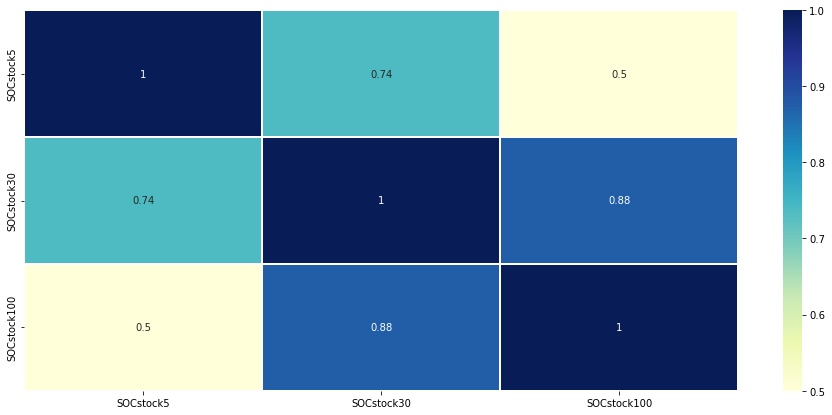

In [60]:
# Plotting the correlation matrix of SOCStocks at 5, 30 and 100 cms.

plt.figure(figsize=(16,7))
sns.heatmap(pedons_df.corr(), annot=True, linewidths = 0.1, cmap="YlGnBu")
plt.show()

#### **`Conclusion:`** SOCstock100 and SOCstock30 are highly co-related to each other

In [11]:
pedons_df.head()

,upedon,rcasiteid,SOCstock5,SOCstock30,SOCstock100,Land_Use
0,A0108P921,A0108P92,15.126360,76.022073,100.113941,Pastureland
1,A0116P901,A0116P90,35.481720,95.965557,242.002573,Pastureland
2,A0116P941,A0116P94,36.827055,104.147733,293.079581,Pastureland
3,A0116X971,A0116X97,6.950620,29.854781,69.735244,CRP
4,A0120R931,A0120R93,13.072982,53.249971,116.996856,Rangeland


In [61]:
pedons_df.to_csv('processed_data\pedons_processed.csv', index=None)